<a href="https://colab.research.google.com/github/girlscodetoo-ch/AI-Arts/blob/main/IntroductionToAI/workshop_DE-Teil3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KS Stans Workshop - Künstliche Intelligenz und Kunst - Teil 3

Willkommen zum dritten Teil des Kunst & Künstliche Intelligenz Workshop. In diesem so genannten _Notebook_ wirst du eine kurze Einführung in die Programmiersprache `Python` bekommen, wirst du erfahren, wie ein Computer Bilder sieht und lernen, wie man mit Künstlicher Intelligenz Kunst schaffen kann. Lasst uns loslegen!

## **Teil III** - Künstliche Intelligenz

![](https://raw.githubusercontent.com/girlscodetoo-ch/AI-Arts/main/images/ai-art.jpg)

Wie kommen wir von hier zur künstlichen Intelligenz (KI)? Unser Ziel ist um mit KI Kunst aus Bildern zu erzeugen. Bis jetzt hast du die Grundlagen von Python gelernt und wie man Bilder in Python verarbeitet. Jetzt wirst du ein wenig über KI lernen. Wir werden mit der Grundidee von KI beginnen und ein einfaches Beispiel selbst erstellen. Wenn du diese Teile verstanden hast, können wir mit komplizierteren KI fortfahren und selbst eine KI für Bilder erstellen.

### Grundlagen von KI

Wir werden zunächst mit einem kurzen Einführungsvideo über künstliche Intelligenz beginnen. Bitte sehe dich das Video unten an.

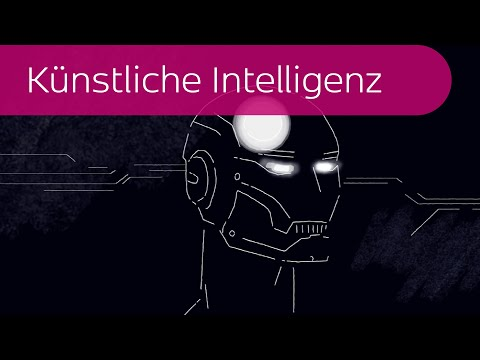

In [ ]:
#@title
from IPython.display import YouTubeVideo
YouTubeVideo('3RsmRMqX2IY', width=750, height=500)

*Kurz zusammengefasst*: KI ist ein Computeralgorithmus oder -modell, das versucht, den Lernprozess des Gehirns zu imitieren. Im Gehirn gibt es viele Nervenzellen, die miteinander verbunden sind und Signale übertragen. Irgendwie ist das Gehirn in der Lage, Dinge zu lernen, z. B. als Kind, wie man bestimmte Tiere erkennt. Indem du viele Tiere beobachtest und von deinen Eltern eine Rückmeldung bekommst, ob du dem Tier den richtigen Namen gibst, hast du gelernt, diese Tiere zu identifizieren. Mit der künstlichen Intelligenz haben die Menschen versucht, diesen Prozess auf Computer zu übertragen. Wir werden in den nächsten Schritten herausfinden, wie das bei Computern funktioniert.

### Ein sehr einfaches neuronales Netz verstehen


Konkret werden wir uns mit einer ganz bestimmten Art von KI beschäftigen, nämlich mit neuronalen Netzen. Mit neuronalen Netzen hat der Mensch versucht, die Neuronenstruktur des Gehirns in Computern nachzuahmen. 

In [ ]:
#@title
from IPython.display import Image
Image(url='https://miro.medium.com/max/640/1*BQ0pIVk56WHyqigI9adDLw.gif')

Ein einfaches neuronales Netz basiert auf dem Prinzip der Betrachtung von Beispielen und dem Erhalt von Feedback zu diesen Beispielen. 

*Aufbau*: Ein neuronales Netz ist immer wie folgt aufgebaut. Es erhält eine Eingabe (**input**), das können zum Beispiel Bilder von Tieren sein. Denke daran, dass Bilder nur Listen von Listen mit Zahlen sind. In jeder nachfolgenden Schicht (**layer**) des Netzes wird die Eingabe mit Zahlen multipliziert, die Gewichte (**weights**) genannt werden. Am Ende steht eine Ausgangszahl (**output**), die in eine Wahrscheinlichkeit für eine bestimmte Beschriftung (**label**) übersetzt werden kann. Dieses Label kann zum Beispiel "Katze" oder "Hund" sein. 

In [ ]:
#@title
from IPython.display import Image
Image(url='https://miro.medium.com/max/720/1*BIpRgx5FsEMhr1k2EqBKFg.gif', width=600, height=350)

*Lernprozess*: Ein neuronales Netz kann dann wie folgt lernen. Jedes Mal, wenn eine Eingabe durch das Netz propagiert wird und eine Ausgabe erzeugt, können wir diese mit der bekannten Beschriftung für die Eingabe vergleichen. Bei einem Bild einer Katze zum Beispiel ist die bekannte Beschriftung "Katze". Wenn die Ausgabe des Netzes eine Wahrscheinlichkeit für eine andere Beschriftung als "Katze" ergibt, können wir dem Netz sagen, dass es falsch ist, und es sollte schrittweise die Gewichte (die Zahlen im Netz) aktualisieren, so dass bei den nächsten Beispielen von Katzen die Beschriftung hoffentlich korrekter sind.

In [ ]:
#@title
from IPython.display import Image
Image(url='https://miro.medium.com/max/720/1*oB3S5yHHhvougJkPXuc8og.gif')

Vergewisser dich, dass du die fett gedruckten Englischen Begriffe einigermaßen verstehst. Diese werden sich im nächsten Teil des Workshops wiederholen. Wir verstehen, dass der Lernprozess für dich vielleicht noch nicht ganz klar ist. Wir hoffen, dass du dies anhand eines einfachen Beispiels etwas besser verstehen wirst.

### Beispiel: Training eines einfachen neuronalen Netzes

Wir werden dir zeigen, wie du ein einfaches neuronales Netz aufbaust und trainierst. Die Aufgabe, die das neuronale Netz erfüllen soll, ist die Klassifizierung von Bildern handgeschriebener Ziffern. Deine Daten bestehen aus Bildern handgeschriebener Ziffern und ihren jeweiligen Beschriftungen und werden als "MNIST-Datensatz" bezeichnet. (Siehe das Beispiel unten.)

In [ ]:
#@title
from IPython.display import Image
print("The MNIST dataset")
Image(url='https://miro.medium.com/max/720/1*O35lwO5O4sK0_9GuE5aG0A.png')

The MNIST dataset


#### Daten

Wir werden die Daten zunächst herunterladen und verarbeiten

In [ ]:
from sklearn.datasets import fetch_openml
from keras.utils.np_utils import to_categorical
import numpy as np
from tqdm import tqdm

Führe die folgende Zelle aus. Das wird ein paar Minuten dauern.

In [ ]:
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)
x = (x/255).astype('float32').to_numpy()
y = to_categorical(y)

Was haben wir hier gerade getan? Wir haben die Daten aus einem Online-Paket heruntergeladen. Der Datensatz, den wir heruntergeladen haben, heißt "*MNIST*" und enthält Bilder von handgeschriebenen Ziffern und deren Beschriftungen. Wir speichern die Bilder in der Variablen `x` und ihre Beschriftungen in der Variablen `y`. Außerdem haben wir die Eingabe `x` und die Ausgabe `y` in den beiden folgenden Zeilen in die richtige Form gebracht (Du musst die Details hier nicht verstehen). Lass uns `x` und `y` kurz ausdrucken, damit du sehen kannst, wie sie aussehen.

In [ ]:
print(x)
print("Shape: ", x.shape)

In [ ]:
from matplotlib import pyplot as plt
print("The first image of the dataset")
plt.imshow(x[0].reshape(28,28), cmap='Greys')
plt.show()

Insgesamt haben wir 70.000 Bilder von handgeschriebenen Ziffern und ihren Beschriftungen. Jedes Bild hat 28x28 Pixel und ist flachgelegt. (Flachgelegt bedeutet, dass wir alle Pixelwerte eines Bildes in eine Liste statt in eine Liste von Listen packen. Für ein Bild haben wir also eine Liste mit insgesamt $28*28=784$ Pixeln.)

In [ ]:
print(y)
print("Shape: ", y.shape)

In [ ]:
print("The first label of the dataset")
print(y[0])

Jedes Label ist eine Liste von 10 Werten. Von 0 bis 9 zählend, ist das $i$-te Element in der Liste gleich 1, wenn die Beschriftung gleich $i$ ist, und sonst gleich 0. Wenn die Beschriftung des Bildes zum Beispiel 2 sein soll, dann ist dieses Array `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]`.

#### Neuronales Netz

Als Nächstes werden wir dir zeigen, wie du ein einfaches neuronales Netz aufbauen kannst. Wir zeigen dir die Grundlagen des Aufbaus eines neuronalen Netzes. Wir zeigen dir die Struktur des Modells und wie du dieses Modell optimieren oder trainieren kannst.

Bevor du dich den nachstehenden Code ansiehst, solltest du wissen, dass ein neuronales Netz nichts Magisches ist. Ein neuronales Netz wird lediglich durch eine Liste von Zahlen definiert, die *Gewichte* genannt werden (zur Erinnerung: Gewichte sind einfach Listen von Listen von Zahlen). Die Gewichte sind die *Parameter* des neuronalen Netzwerkmodells und sie definieren ein neuronales Netzwerkmodell wie folgt:

1.   Die *Anzahl* der Gewichte bestimmt die tatsächliche Größe des Modells und damit seine Leistungsfähigkeit.
2.   Die *Struktur* der Gewichte bestimmt, welche Daten Sie laden können und damit auch, wie leistungsfähig das Modell ist.
3.   Der *Wert* der Gewichte bestimmt die Beziehung zwischen der Eingabe (hier: Bild) und der Ausgabe (hier: Beschriftung). Unser Ziel ist es also, die Gewichte zu finden, die die Beziehung zwischen Eingabe und Ausgabe am besten beschreiben.



In [ ]:
from scipy.special import softmax
from sklearn.metrics import log_loss

class MyFirstNeuralNetwork:
    def __init__(self):
        self.weights = np.random.randn(784, 10) # Hier definieren wir die Gewichte des neuronalen Netzes
        self.learning_rate = 1e-3

    def forward(self, x):
        # Hier wird ein Bild durch das Netz geschickt, um die vorhergesagte Beschriftung zu berechnen
        y_pred = softmax(x @ self.weights)
        return y_pred

    def loss(self, y, y_pred):
        # Die Differenz zwischen der wahrer Beschriftung und der vorhergesagter Beschriftung
        return log_loss(y, y_pred)

    def update_weights(self, x, y, y_pred):
        # Gradient descent Algorithmus
        # Aktualisierung der Gewichte proportional zum der Ableitung des Verlustes "loss"
        error = y - y_pred
        grad = x.T @ error
        self.weights -= self.learning_rate * grad

In [ ]:
batch_size = 1000 # wie viele Bilder wir in einem Schritt durch das Netz leiten
epochs = 100 # wie oft wir den ganzen Datensatz durch das Netz schicken, um die Gewichte anzupassen

loss = np.zeros(epochs) # um die Differenz zwischen der wahrer Beschriftung und der vorhergesagter Beschriftung zu verfolgen
model = MyFirstNeuralNetwork() # wir erstellen unser neuronales Netz

print("Training des neuronalen Netzes...")
for e in tqdm(range(epochs)): # wir iterieren "epochs" Mahl über den gesamten Datensatz

    epoch_loss = []

    for i in range(0, len(x), batch_size): # wir iterieren stapelweise über den Datensatz
        
        # wir leiten den Datenstapel (batch) über das Netz weiter
        y_pred = model.forward(x[i:i+batch_size])
        
        # wir berechnen die Differenz zwischen der vorhergesagter und der wahrer Beschriftung
        epoch_loss.append(model.loss(y[i:i+batch_size], y_pred))
        
        # wir aktualisieren die Gewichte des Netzes anhand des Verlustes
        model.update_weights(x[i:i+batch_size], y[i:i+batch_size], y_pred)

    # wir berechnen den mittleren Verlust über den gesamten Datensatz
    loss[e] = np.mean(epoch_loss)

Lass uns analysieren, was wir hier gerade getan haben. Zunächst werden wir einige Variablen in den obigen Codeblöcken erklären.


| parameter | explanation |
| :-------- | :---------- |
| `weights` | die Parameter des Modells, die das Verhältnis zwischen Input und Output bestimmen |
| `forward` | berechne bei einem Eingangsbild die vorausgesagte Ausgabe anhand der aktuellen Gewichte des neuronalen Netzes |
| `y_pred`  | die vorhergesagten Beschriftungen für die Eingabebilder |
| `y`       | die wahren Beschriftungen für die Eingabebilder |
| `loss`    | eine Funktion, die den Unterschied zwischen der wahrer Beschriftung und der vorhergesagter Beschriftung quantifiziert |
| `update_weights` | aktualisiere die Gewichte auf der Grundlage der Bild- und Beschriftungsbeispiele, die das Netz gesehen hat |
| `learning_rate` | wie groß (proportional) der Schritt ist, der bei der Aktualisierung der Gewichte zu machen ist |
| `batch_size` | wie viele Bilder in einem Schritt über das Netz weitergeleitet werden sollen |
| `epochs` | wie oft der gesamte Datensatz über das Netz weitergeleitet werden soll |


Was wir oben tun, ist Folgendes. Jedes Mal, wenn wir Daten über das Netzwerk weiterleiten, führen wir drei Schritte durch:

1.   `forward`: Wir berechnen die vorhergesagten Beschriftungen anhand der aktuellen Gewichte des Netzes.
2.   `loss`: Wir berechnen die Differenz zwischen den vorhergesagten Beschriftungen und den wahren Beschriftungen der Daten.
3.   `update_weights`: Wir aktualisieren die Gewichte anhand der Differenz zwischen vorhergesagter und wahrer Beschriftung.

In den beiden `for`-loops durchlaufen wir den Datensatz und geben dem neuronalen Netz weitere Bildbeispiele und ihre jeweiligen Bezeichnungen. Auf diese Weise können wir die Gewichte mit mehr Informationen über die Beziehung zwischen Bildern und Bezeichnungen aktualisieren.

Wir können sehen, wie der Verlust nach jeder Epoche des "Trainings" des neuronalen Netzes abnimmt.

In [ ]:
from matplotlib import pyplot as plt 

plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Es ist wichtig zu verstehen, dass alle drei Schritte nur Mathematik sind. Wir wollen nicht, dass du die genauen Details der Mathematik verstehst (das ist eher ein Informatikstudium). Du sollst jedoch erkennen, dass es sich hier nur um Mathematik handelt. Wir multiplizieren Listen von Listen von Zahlen miteinander, mit dem Endziel, die beste Liste von Listen zu finden, die die Daten beschreiben.

In [ ]:
#@title
from IPython.display import HTML
HTML('<iframe src="https://giphy.com/embed/BmmfETghGOPrW" width="480" height="206" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/reaction-BmmfETghGOPrW">via GIPHY</a></p>')

#### Für die Experten

Wenn das hieroben für dich leicht zu verstehen war, kannst du den folgenden Text gerne weiter lesen. Andernfalls empfehlen wir dir, die nächsten Abschnitte zu überspringen.

Was geschah also tatsächlich in den Funktionen, den drei Schritten, oben? 

In der Funktion `forward`, berechnen wir die vorhergesagten Beschriftungen `y_pred` (in der Formel unten $\hat{y}$), gegeben die Gewichte `weights` (in der Formel $w$) und die Eingabebilder `x` (in der Formel $x$) mit der folgenden Formel:

$$ \hat{y} = \sigma \left( w^\top \cdot x \right) $$

Die `softmax`-Funktion $\sigma$ wird aus mathematischen Gründen benötigt (wir gehen hier nicht weiter darauf ein) und ist definiert als $$\sigma(z)_j = \frac{e^{z_j}}{\sum_k e^{z_k}} $$.

In der Funktion `loss` (in der Formel $\mathcal{L}$) berechnen wir die Differenz zwischen den wahren Beschriftungen `y` (in der Formel $y$) und den vorhergesagten Beschriftungen `y_pred` (in der Formel $\hat{y}$). Dazu verwenden wir eine "loss-Funktion" mit der Bezeichnung *categorical cross-entropy* (auch bekannt als `log_loss`), die wie folgt definiert ist:

$$ \mathcal{L} (y, \hat{y}) = - (y \log({\hat{y}}) + (1-y)\log({1-\hat{y}}))$$

Diese Funktion wird typischerweise in neuronalen Netzen für die Art von Aufgaben verwendet, die wir hier zu lösen versuchen, nämlich *Klassifizierungsprobleme*. 

Mit der Funktion `update_weights` aktualisieren wir die Gewichte des Netzes unter Berücksichtigung des oben berechneten Verlustes. In der Tat werden die Gewichte proportional zur Ableitung der Verlustfunktion aktualisiert. Dieser Algorithmus wird *gradient descent* genannt. Es gibt viele andere Methoden, um die besten Gewichte der Netze zu finden, dies ist eine der einfacheren. 

In [ ]:
#@title
from IPython.display import Image
Image(url='https://miro.medium.com/max/720/1*Mi63W9thPnat0EIRoqWR9Q.png')

Wenn mann eine Abbildung mit den Gewichten auf der x-Achse und der Verlustfunktion auf der y-Achse erstellt, ist das Ziel um die Gewichte zu finden, die dem Minimum der Verlustfunktion entsprechen. Beim gradient descent aktualisiert mann die Gewichte des Netzes proportional zur Ableitung der Verlustfunktion. 

$$w_{\text{new}} = w_{\text{old}} - \eta \frac{d\mathcal{L}}{dw}$$

Der `learning_rate` ist $\eta$ in der Formel. Da $w$ in der Regel eine Matrix ist (also eine Liste von Listen von Zahlen), ist die Ableitung leider nicht so einfach. Es ist jedoch nur wichtig, dass du das Konzept des Algorithmus verstehst.

Wenn du es geschafft hast, das bis hierher zu verstehen, dann Hut ab vor dir, Einstein! Das ist wirklich eine beeindruckende Arbeit hier. 

### Einfache Implementierung eines neuronalen Netzes

Wir werden dir nun zeigen, wie du auf einfache Weise ein neuronales Netzwerk mit Bibliotheken implementieren kannst, die du die meiste Arbeit abnehmen. Die Bibliothek, die wir verwenden werden, heißt Tensorflow. Wir werden auch ein paar andere Erweiterungen zu dem hinzufügen, was wir vorher gemacht haben.. Wir werden Schritt für Schritt erklären, worum es sich dabei handelt.

#### Trainings- und Testdatensatz

Zuerst laden wir die Daten. Wir laden die Daten aus der Tensorflow-Bibliothek.

In [1]:
import numpy as np
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Beachte, dass in Tensorflow unser Datensatz in zwei Hälften aufgeteilt ist: ein Trainingsset und ein Testset. Warum ist dies der Fall, wirst du dich fragen? In der künstlichen Intelligenz will mann das Modell trainieren, aber gleichzeitig ist es wichtig, dass das Modell auch auf ungesehenen Daten gut funktioniert. Wenn wir unserem Modell immer dieselben Daten vorlegen, wird es die genauen Details dieses Datensatzes lernen und bei Daten, die es noch nie gesehen hat, nicht so gut funktionieren. 

Wir können das an einem einfachen Beispiel veranschaulichen. Im wirklichen Leben ist es etwas komplexer, aber das soll nur zum Verständnis dienen. Wenn du zum Beispiel deinem neuronalen Netz während des Trainingsprozesses Bilder von einer Katze und einem Hund gibst, dann wird es dieselben Katzen und Hunde so oft sehen, dass es vielleicht nur noch auf irrelevante Details in den Bildern dieser Katzen und Hunde achten wird. Zum Beispiel wird das Modell sagen, 

> "Wenn ich etwas sehe mit Augen, einer Nase und spitzen Ohren, 4 Pfoten, einem Schwanz, einer roten Farbe, aber dann auch genau 23 Schnurrhaare, Streifen an bestimmten Stellen, immer auf einer blauen Couch, dann ist es eine Katze. Und wenn ich etwas mit Augen, spitzer Nase, herunterhängenden Ohren, 4 Pfoten, braunem Fell sehe, aber dann auch noch einen Tennisball in der Hand halte und auf einer grünen Wiese laufe, dann ist es ein Hund. Nur unter diesen besonderen Umständen weiß ich, um welches Tier es sich handelt, in allen anderen Fällen weiß ich es nicht."

Dies ist ein anschauliches Beispiel für das, was wir *Overfitting* nennen. Das Modell lernt die genauen Details der Daten, die es gesehen hat, unabhängig von allen anderen Daten da draußen.

Nun fahren wir mit denselben Schritten fort, die wir zuvor mit den Daten durchgeführt haben, aber jetzt mit der Trainings-Eingabe `x_train` und der -Ausgabe `y_train` und der Test-Eingabe `x_test` und der -Ausgabe `y_test`.

In [ ]:
x_train = (x_train/255).astype('float32')
x_test = (x_test/255).astype('float32')

print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

In [3]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Jetzt müssen wir unsere Bilder neu formen, da dies eine Anforderung der Tensorflow-Bibliothek ist.

In [5]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

Außerdem werden wir hier einige Variablen definieren, die für später nützlich sein können. 


In [ ]:
print('Size of the images: ', x_train.shape[1:])

In [7]:
input_shape = x_train.shape[1:]

In [ ]:
print("Number of output categories: ", y_train.shape[1])

In [10]:
output_shape = y_train.shape[1]

#### Verschiedene Arten von Modellen

Im nächsten Schritt werden wir unser Modell mit der Tensorflow-Bibliothek erstellen. Wir werden dies ein wenig anders machen als zuvor. Vorher haben wir ein extrem einfaches neuronales Netz verwendet. Die Eingabeschichten waren direkt mit den Ausgabeschichten verbunden. Das Besondere an neuronalen Netzen ist jedoch, dass man viel mehr Schichten (layers) erstellen kann und so eine Art "Tiefe" im Netz erzeugt. Außerdem gibt es auch Schichten, die speziell für Bilder gedacht sind. Sie werden als *convolutional* layers bezeichnet und führen spezielle mathematische Berechnungen durch, um die Struktur des Bildes zu verarbeiten.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# We define an empty model and add layers from input to output
model = Sequential()

# Add a first layer for processing the structure of the image
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

# Add more "deep" layers in the neural network
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))

# The last layer of the network defining the output
model.add(Dense(output_shape, activation=tf.nn.softmax))

Nachdem wir nun das Modell definiert haben, erstellen wir es im Folgenden.

In [12]:
model.compile(optimizer='adam', # the optimization algorithm, similar to gradient descent
              loss='categorical_crossentropy', # the loss function
              metrics=['accuracy'])

Schauen wir uns an, was passiert, wenn wir dieses Modell verwenden, um die Bezeichnung eines Bildes vorherzusagen.

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0].squeeze(-1), cmap='Greys')
plt.show()

In [ ]:
model.predict(np.expand_dims(x_train[0], 0)).argmax(axis=1)

Das sieht nicht wirklich gut aus, oder? Du kannst selbst einige Bilder ausprobieren, indem du die [`0`] in eine andere Zahl änderst.

Im folgenden Schritt werden wir das Modell trainieren mit der `fit` Funktion, damit es bessere Vorhersagen machen kann. Für das Training selbst verwenden wir jedoch nur die Daten aus dem Trainingssatz `x_train` und `y_train`. Der Testsatz wird nur verwendet, um zu beobachten, was passiert, aber das Modell lernt nicht wirklich aus dem Testsatz.

In [16]:
epochs=10

In [ ]:
history = model.fit(x=x_train, y=y_train, validation_data=[x_test, y_test], epochs=epochs)

Nach etwa 5 Minuten ist dein Modell mit der Trainingsphase fertig. Hole dich einen schönen Drink oder lese unten weiter.

Mal sehen, ob wir bei der Vorhersage besser geworden sind.

In [ ]:
plt.imshow(x_train[0].squeeze(-1), cmap='Greys')
plt.show()

In [ ]:
model.predict(np.expand_dims(x_train[0], 0)).argmax(axis=1)

#### Metriken

Nachdem wir nun das Modell trainiert haben, wollen wir sehen, wie gut es auf dem gesamten Datensatz funktioniert. Im obigen Code hast du vielleicht bemerkt, dass wir mit *Metriken* (`metrics`) gearbeitet haben. Metriken sind Funktionen, ähnlich wie die Verlustfunktion, die den Unterschied zwischen den wahren und den vorhergesagten Bezeichnungen quantifizieren. Eine der Metriken, die wir hier verwendet haben, ist die "Accuracy". Die Genauigkeit ist das, was du vielleicht denken. Sie ist der Prozentsatz der richtig klassifizierten Bilder geteilt durch die Gesamtzahl der Bilder.

Als wir den Trainings- und Testdatensatz erläuterten, erwähnten wir kurz das Prinzip der *Overfitting*. Ein Blick auf die Metriken für den Trainings- und den Testdatensatz kann uns helfen, eine Overfitting zu verhindern. Wir wollen zum Beispiel kein Modell, das eine sehr hohe Genauigkeit im Trainingsdatensatz hat, aber eine sehr niedrige Genauigkeit im Testdatensatz. Das würde bedeuten, dass das Modell bei ungesehenen Daten nicht gut funktioniert. Wir zeigen dir im Folgenden, wie du das untersuchen kannst.

Unten sehen wir den Verlust und die Genauigkeit des Modells auf dem Trainings- und Testdatensatz während des Trainings des Modells. Beachte, dass nur die Daten des Trainingssatzes zum Trainieren des Modells verwendet wurden. Die Daten des Testdatensatzes wurden nur zur Überwachung der Metriken während des Trainings verwendet.

In [ ]:
history.history

Versuchen wir, das abzubilden.

In [ ]:
from matplotlib import pyplot as plt
plt.plot(np.arange(epochs), history.history['accuracy'], label='train')
plt.plot(np.arange(epochs), history.history['accuracy'], label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Was siehst du in dieser Abbildung? Haltest du es für gut?

### Data Challenges auf kaggle.com

Bei Ki geht es auch viel um so gennante *Benchmarks, Performance, und Accuracy*, diese Worte werden dazu benutzt KI Modele zu objektiv zu bewerten und Menschen einen Eindruck zu geben wie genau und gut ein Model funktioniert. 

Um euch dazu ein besseres Verständnis zu geben werden wir euch heute die **Fashion MNIST - GCT** Challenge vorstellen. 

So gennate Data Science Challenges gibt es viele und haben als Ziel Leute von aller Welt zusammen zu bringen, um an Coolen Problemen zu arbeiten. Jede Challenge hat ein Preisgeld für die drei besten Teams. Viele von diese Challenges werde auf Kaggle.com ausgetragen.  

Kaggle, eine Tochtergesellschaft von Google, ist eine Online-Gemeinschaft von Datenwissenschaftlern und Fachleuten für maschinelles Lernen. Kaggle ermöglicht es den Nutzern, Datensätze zu finden und zu veröffentlichen, Modelle in einer webbasierten datenwissenschaftlichen Umgebung zu untersuchen und zu erstellen, mit anderen Datenwissenschaftlern und Ingenieuren für maschinelles Lernen zusammenzuarbeiten und an Wettbewerben teilzunehmen, um datenwissenschaftliche Herausforderungen zu lösen.

Kaggle begann 2010 mit dem Angebot von Wettbewerben zum maschinellen Lernen und bietet jetzt auch eine öffentliche Datenplattform, eine Cloud-basierte Workbench für die Datenwissenschaft und Schulungen zur künstlichen Intelligenz an. Die wichtigsten Mitarbeiter des Unternehmens waren Anthony Goldbloom und Jeremy Howard. Nicholas Gruen war der Gründungsvorsitzende, gefolgt von Max Levchin. Im Jahr 2011 wurde eine Kapitalerhöhung durchgeführt, bei der das Unternehmen mit 25,2 Millionen Dollar bewertet wurde. Am 8. März 2017 kündigte Google die Übernahme von Kaggle an.

**Die heutige Challenge**

Heute geht es bei uns um die [**Fashion MNIST - GCT**](https://www.kaggle.com/competitions/fashiongct) Challenge. Ziel der Challenge ist es die beste Performance auf dem Fashion MNIST Datensatz zu erreichen.

Fashion-MNIST ist ein Datensatz von Zalando-Artikelbildern - bestehend aus einem Trainingssatz von 60.000 Beispielen und einem Testsatz von 10.000 Beispielen. Jedes Beispiel ist ein 28x28-Graustufenbild, das mit einem Label aus 10 Klassen verknüpft ist. Die Klassen sind: 

- 0 T-shirt/Oberteil
- 1 Hose
- 2 Pullover
- 3 Kleid
- 4 Mantel
- 5 Sandale
- 6 Hemd
- 7 Turnschuh
- 8 Tasche
- 9 Stiefelette

Zalando beabsichtigt, Fashion-MNIST als direkten Ersatz für den ursprünglichen MNIST-Datensatz zum Benchmarking von Algorithmen für maschinelles Lernen zu verwenden. Er hat die gleiche Bildgröße und Struktur der Trainings- und Test-Splits.

Der ursprüngliche MNIST-Datensatz enthält viele handgeschriebene Ziffern. Mitglieder der AI/ML/Data Science-Gemeinschaft lieben diesen Datensatz und verwenden ihn als Benchmark, um ihre Algorithmen zu validieren. In der Tat ist MNIST oft der erste Datensatz, den Forscher ausprobieren. "Wenn es auf MNIST nicht funktioniert, funktioniert es überhaupt nicht", heißt es. "Wenn es auf MNIST funktioniert, kann es auf anderen Datensätzen immer noch scheitern."

Um mit der Challenge anzufangen, öffnet bitte [diesem Link](https://www.kaggle.com/competitions/fashiongct). 

# Et voilà! Ihr habt es geschafft! 

# Weitere Beispiele

Falls ihr noch nicht genug habt, könnte ihr auch gerne hier malreinschauen: 

- https://medium.com/@hannalee/art-creator-25fda3c35d8b
- https://medium.com/@ecyy/tensorflow-hub-create-an-artistic-picture-by-a-ml-app-e21308c7db1b

Viel Spass und vielen Dank, dass ihr bis zum Ende alles gegeben habt! 